# Advanced Visualization - Seaborn

In [1]:
import numpy as np
np.random.seed(29)

import pandas as pd
pd.set_option("display.max_columns", None)

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
plt.style.use('fivethirtyeight')
%matplotlib inline

import seaborn as sns

%load_ext autoreload
%autoreload 2

import os


- name: The English name of the Pokemon
- japanese_name: The Original Japanese name of the Pokemon
- pokedex_number: The entry number of the Pokemon in the National Pokedex
- percentage_male: The percentage of the species that are male. Blank if the Pokemon is genderless.
- type1: The Primary Type of the Pokemon
- type2: The Secondary Type of the Pokemon
- classification: The Classification of the Pokemon as described by the Sun and Moon Pokedex
- height_m: Height of the Pokemon in metres
- weight_kg: The Weight of the Pokemon in kilograms
- capture_rate: Capture Rate of the Pokemon
- baseeggsteps: The number of steps required to hatch an egg of the Pokemon
- abilities: A stringified list of abilities that the Pokemon is capable of having
- experience_growth: The Experience Growth of the Pokemon
- base_happiness: Base Happiness of the Pokemon
- against_?: Eighteen features that denote the amount of damage taken against an attack of a particular type
- hp: The Base HP of the Pokemon
- attack: The Base Attack of the Pokemon
- defense: The Base Defense of the Pokemon
- sp_attack: The Base Special Attack of the Pokemon
- sp_defense: The Base Special Defense of the Pokemon
- speed: The Base Speed of the Pokemon
- generation: The numbered generation which the Pokemon was first introduced
- is_legendary: Denotes if the Pokemon is legendary.

In [2]:
df = pd.read_csv('pokemon/pokemon_data.csv')
pd.set_option('display.max_columns', None)
df.head()

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,against_grass,against_ground,against_ice,against_normal,against_poison,against_psychic,against_rock,against_steel,against_water,attack,base_egg_steps,base_happiness,base_total,capture_rate,classfication,defense,experience_growth,height_m,hp,japanese_name,name,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,49,5120,70,318,45,Seed Pokémon,49,1059860,0.7,45,Fushigidaneフシギダネ,Bulbasaur,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,62,5120,70,405,45,Seed Pokémon,63,1059860,1.0,60,Fushigisouフシギソウ,Ivysaur,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,0.25,1.0,2.0,1.0,1.0,2.0,1.0,1.0,0.5,100,5120,70,625,45,Seed Pokémon,123,1059860,2.0,80,Fushigibanaフシギバナ,Venusaur,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,52,5120,70,309,45,Lizard Pokémon,43,1059860,0.6,39,Hitokageヒトカゲ,Charmander,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,0.50,2.0,0.5,1.0,1.0,1.0,2.0,0.5,2.0,64,5120,70,405,45,Flame Pokémon,58,1059860,1.1,58,Lizardoリザード,Charmeleon,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [3]:
for feature in df:
    print(feature, df[feature].count())

abilities 801
against_bug 801
against_dark 801
against_dragon 801
against_electric 801
against_fairy 801
against_fight 801
against_fire 801
against_flying 801
against_ghost 801
against_grass 801
against_ground 801
against_ice 801
against_normal 801
against_poison 801
against_psychic 801
against_rock 801
against_steel 801
against_water 801
attack 801
base_egg_steps 801
base_happiness 801
base_total 801
capture_rate 801
classfication 801
defense 801
experience_growth 801
height_m 781
hp 801
japanese_name 801
name 801
percentage_male 703
pokedex_number 801
sp_attack 801
sp_defense 801
speed 801
type1 801
type2 417
weight_kg 781
generation 801
is_legendary 801


In [4]:
#impute missing value
df.height_m.fillna(np.mean(df.height_m), inplace=True)
df.weight_kg.fillna(np.mean(df.weight_kg), inplace=True)
df.percentage_male.fillna(df.percentage_male.max(), inplace=True)

#drop unuseful feature
df.drop(columns='type2', inplace=True)

# Styling

<Figure size 432x288 with 0 Axes>

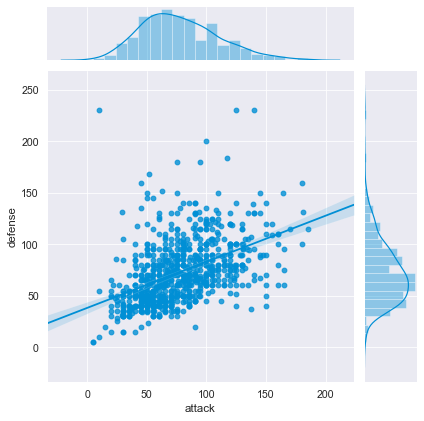

In [5]:
# set_style option : darkgrid, whitegrid, dark, white, ticks
sns.set_style('darkgrid');

#set_context option: paper, notebook, talk, poster
sns.set_context(context='paper', font_scale=1.2);

sns.despine(left=False, bottom=True);

sns.jointplot(x= df.attack, y= df.defense, kind='reg');

# Numerical Data

### 1. Distribution Plot

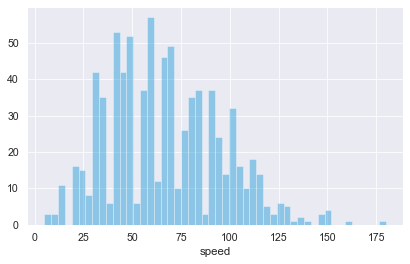

In [6]:
sns.distplot(df.speed, kde=False, bins=50);

### 2. Joint Plot

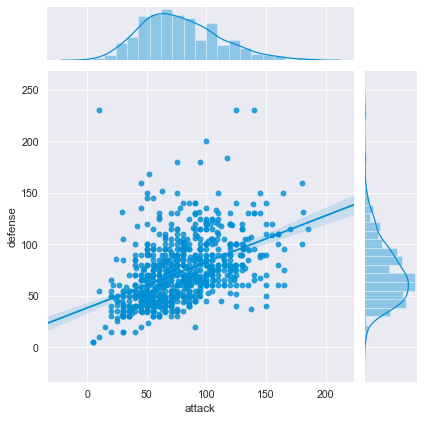

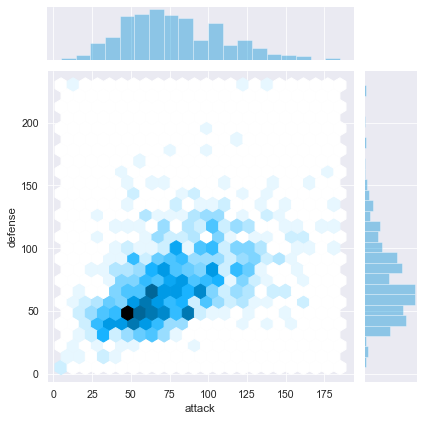

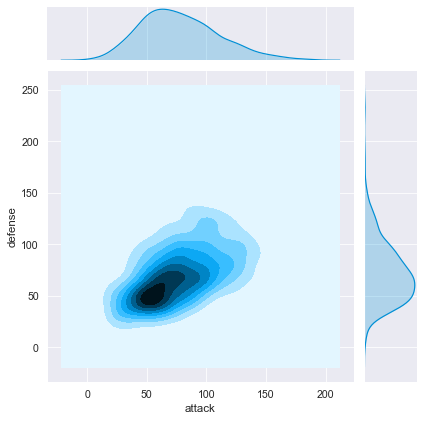

In [7]:
sns.jointplot(x= df.attack, y= df.defense, kind='reg');
sns.jointplot(x= df.attack, y= df.defense, kind='hex');
sns.jointplot(x= df.attack, y= df.defense, kind='kde');

### 3. KDE Plot

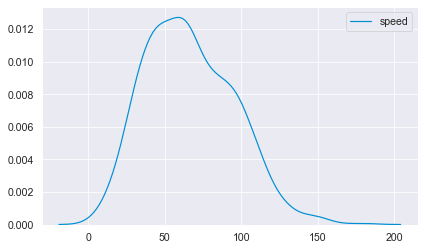

In [8]:
sns.kdeplot(df.speed);

### 4. Pair Plot

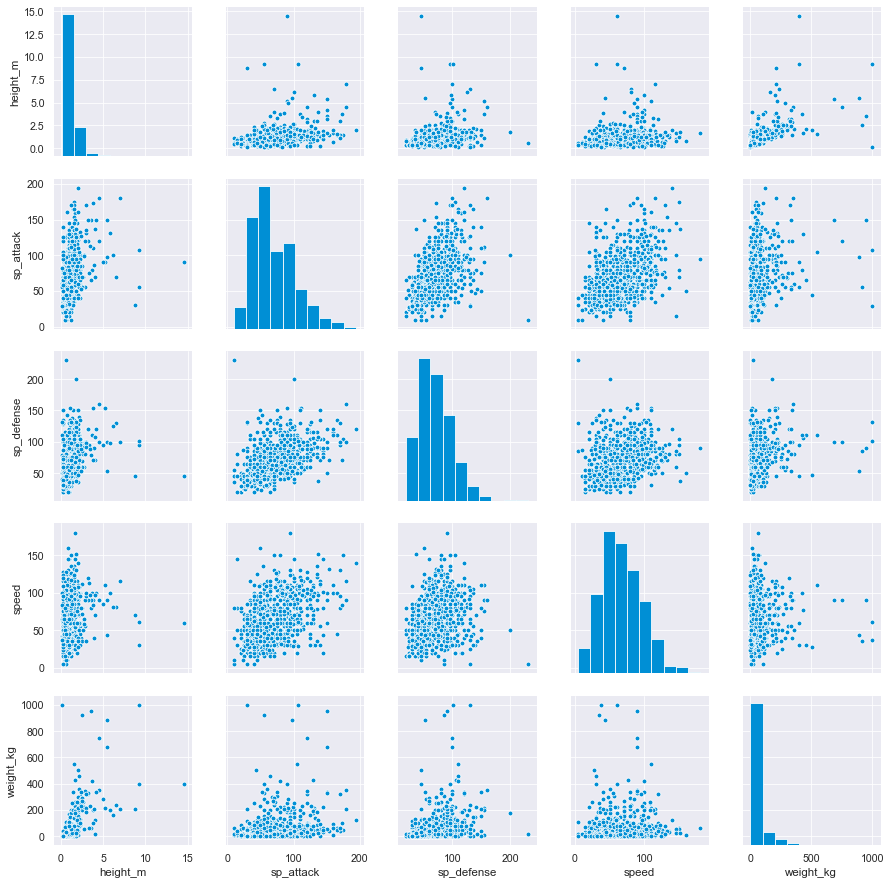

In [9]:
pairplot_df = df[[ 'height_m', 'sp_attack', 'sp_defense', 'speed', 'weight_kg']]

sns.pairplot(pairplot_df);

### 5. Rug Plot

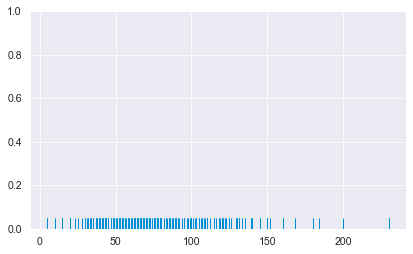

In [10]:
sns.rugplot(df.defense);

# Categorical Data

### 1. Bar Plot

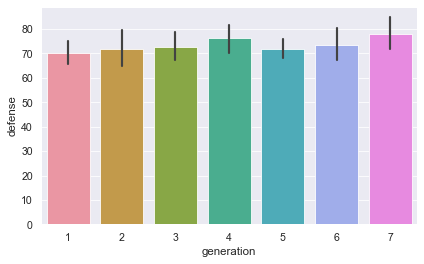

In [11]:
sns.barplot(x= df.generation, y= df.defense );

### 2. Count Plot

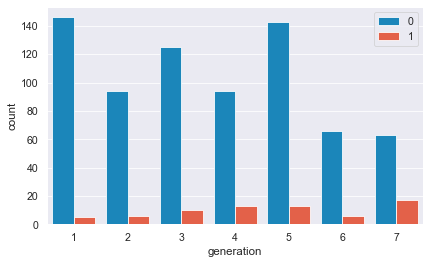

In [12]:
sns.countplot(x= df.generation, hue= df.is_legendary )

# best decision = 0, upper right =1, upper left = 2, lower left = 3, lower right = 4
plt.legend(loc=0);

### 3. Box Plot

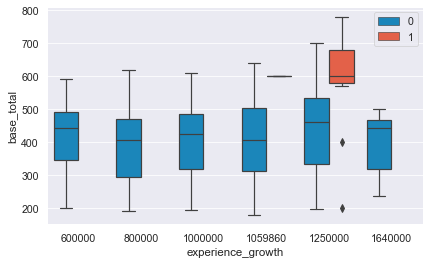

In [13]:
sns.boxplot(x= df.experience_growth, y= df.base_total, hue= df.is_legendary)

plt.legend(loc=0);

### 4. Violin Plot

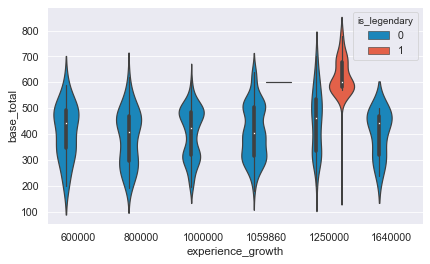

In [14]:
sns.violinplot(x= df.experience_growth, y= df.base_total, hue= df.is_legendary);

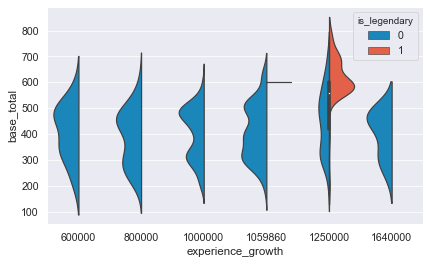

In [15]:
sns.violinplot(x= df.experience_growth, y= df.base_total, hue= df.is_legendary, split=True);

### 5. Strip Plot

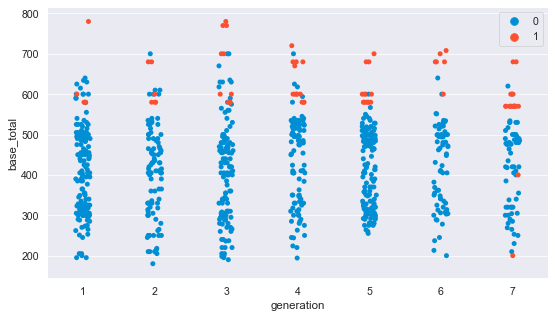

In [16]:
plt.figure(figsize=(8, 5))
sns.stripplot(x= df.generation, y= df.base_total, hue= df.is_legendary)
plt.legend(loc=0);

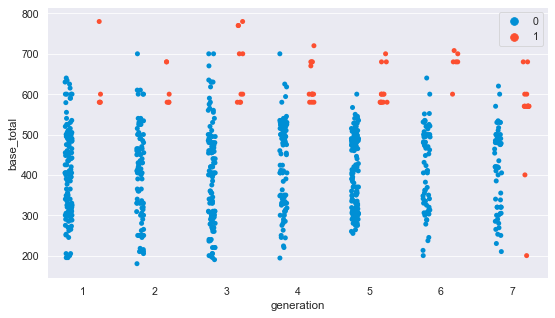

In [17]:
plt.figure(figsize=(8, 5))
sns.stripplot(x= df.generation, y= df.base_total, hue= df.is_legendary, dodge=True )
plt.legend(loc=0);

### 6. Swarm Plot

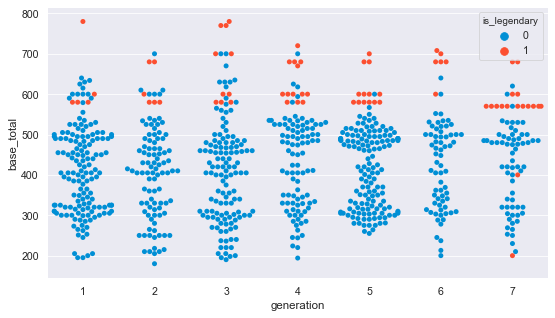

In [18]:
plt.figure(figsize=(8, 5))
sns.swarmplot(x= df.generation, y= df.base_total, hue= df.is_legendary);

### 7. Palettes

you can check here for any palettes option

https://matplotlib.org/stable/tutorials/colors/colormaps.html

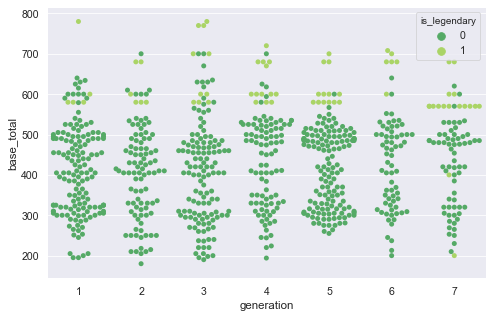

In [19]:
plt.figure(figsize=(7, 5))
sns.swarmplot(x= df.generation, y= df.base_total, hue= df.is_legendary, palette='summer');

# Matrix Plot

### 1. Heatmaps

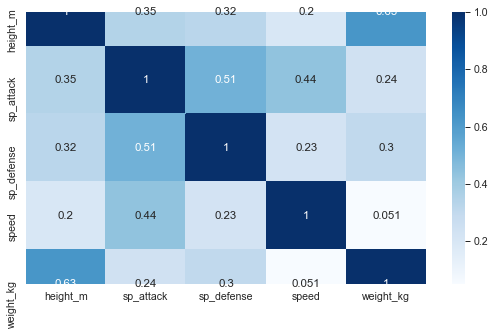

In [20]:
pairplot_df = df[[ 'height_m', 'sp_attack', 'sp_defense', 'speed', 'weight_kg']]
pairplot_df = pairplot_df.corr()
plt.figure(figsize=(8,5))
sns.heatmap(pairplot_df, annot=True, cmap='Blues');

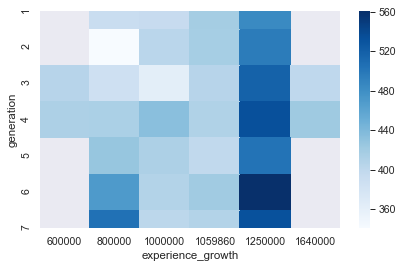

In [21]:
pairplot_df2 = df[['experience_growth', 'generation', 'base_total']]
pairplot_df2 = pairplot_df2.pivot_table(index='generation', columns='experience_growth', values='base_total')

sns.heatmap(pairplot_df2, cmap='Blues');

### 2. Clustermap

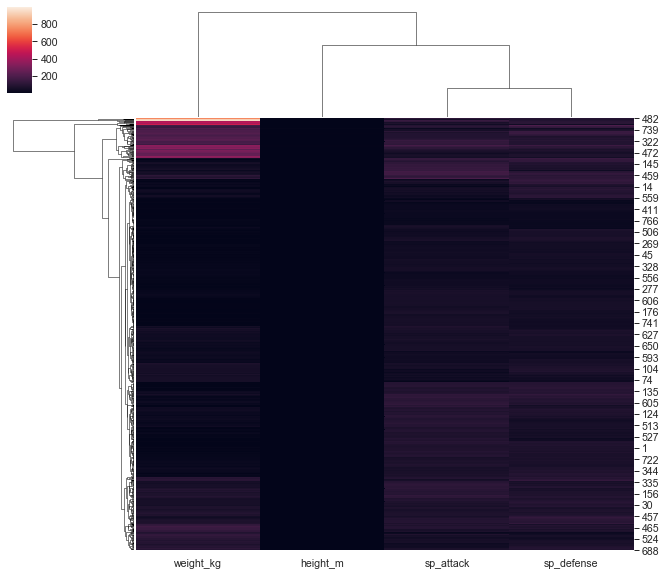

In [22]:
clustermap_data = df[['sp_attack', 'sp_defense','height_m', 'weight_kg']]
sns.clustermap(clustermap_data);

### 3. Pair Grid

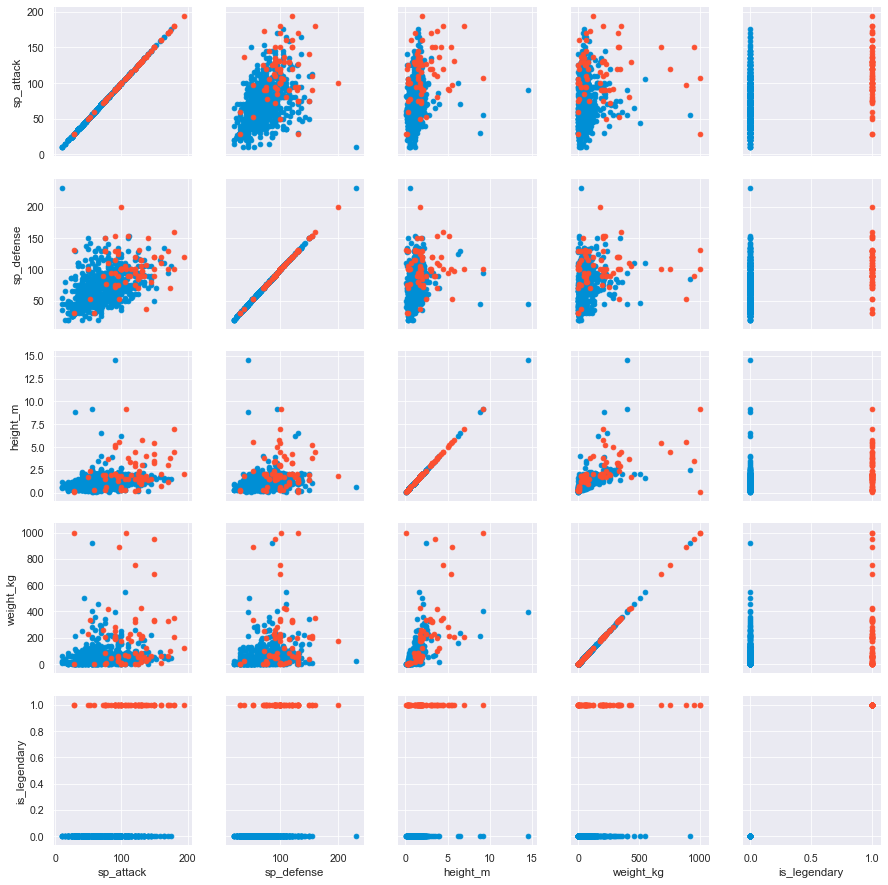

In [23]:
pairgrid_df = df[['sp_attack', 'sp_defense','height_m', 'weight_kg', 'is_legendary']]
pairgrid_df = sns.PairGrid(pairgrid_df, hue='is_legendary')
pairgrid_df.map(plt.scatter);

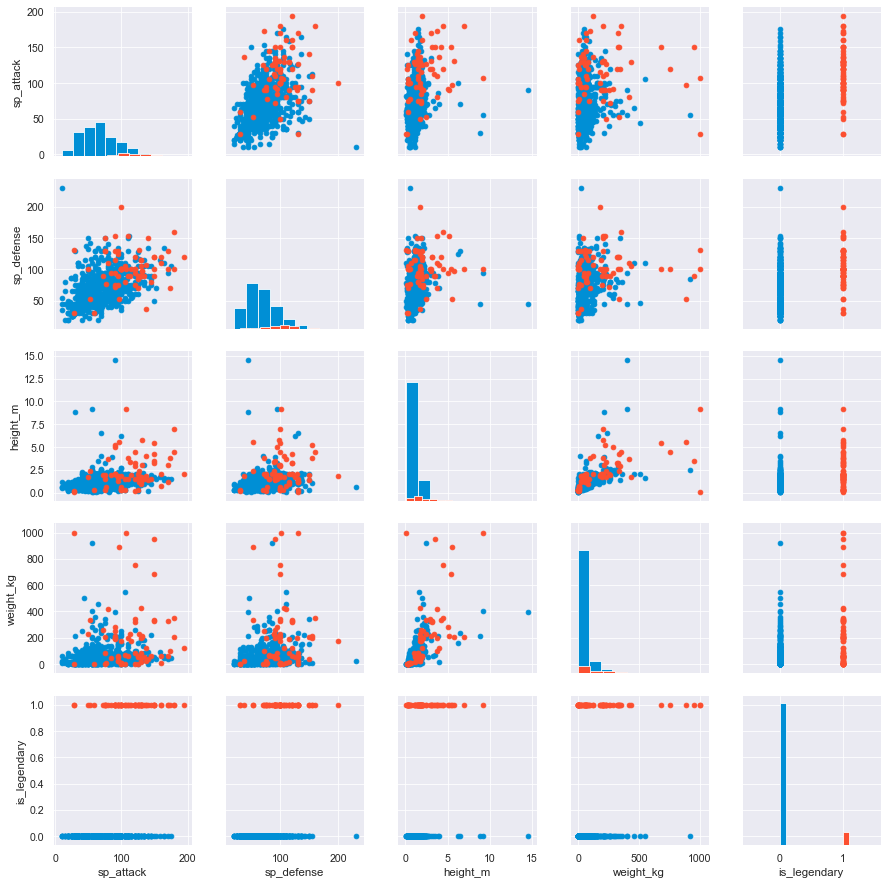

In [24]:
pairgrid_df = df[['sp_attack', 'sp_defense','height_m', 'weight_kg', 'is_legendary']]
pairgrid_df = sns.PairGrid(pairgrid_df, hue='is_legendary')
pairgrid_df.map_diag(plt.hist)
pairgrid_df.map_offdiag(plt.scatter);

/Users/donglin/Tools/anaconda3/lib/python3.7/site-packages/statsmodels/nonparametric/kernels.py:128: RuntimeWarning: invalid value encountered in true_divide
  return (1. / np.sqrt(2 * np.pi)) * np.exp(-(Xi - x)**2 / (h**2 * 2.))
/Users/donglin/Tools/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1520: UserWarning: Warning: converting a masked element to nan.
  self.zmax = float(z.max())
/Users/donglin/Tools/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1521: UserWarning: Warning: converting a masked element to nan.
  self.zmin = float(z.min())
/Users/donglin/Tools/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1169: RuntimeWarning: invalid value encountered in less
  under = np.nonzero(lev < self.zmin)[0]
/Users/donglin/Tools/anaconda3/lib/python3.7/site-packages/matplotlib/contour.py:1171: RuntimeWarning: invalid value encountered in greater
  over = np.nonzero(lev > self.zmax)[0]
/Users/donglin/Tools/anaconda3/lib/python3.7/site-packages/matpl

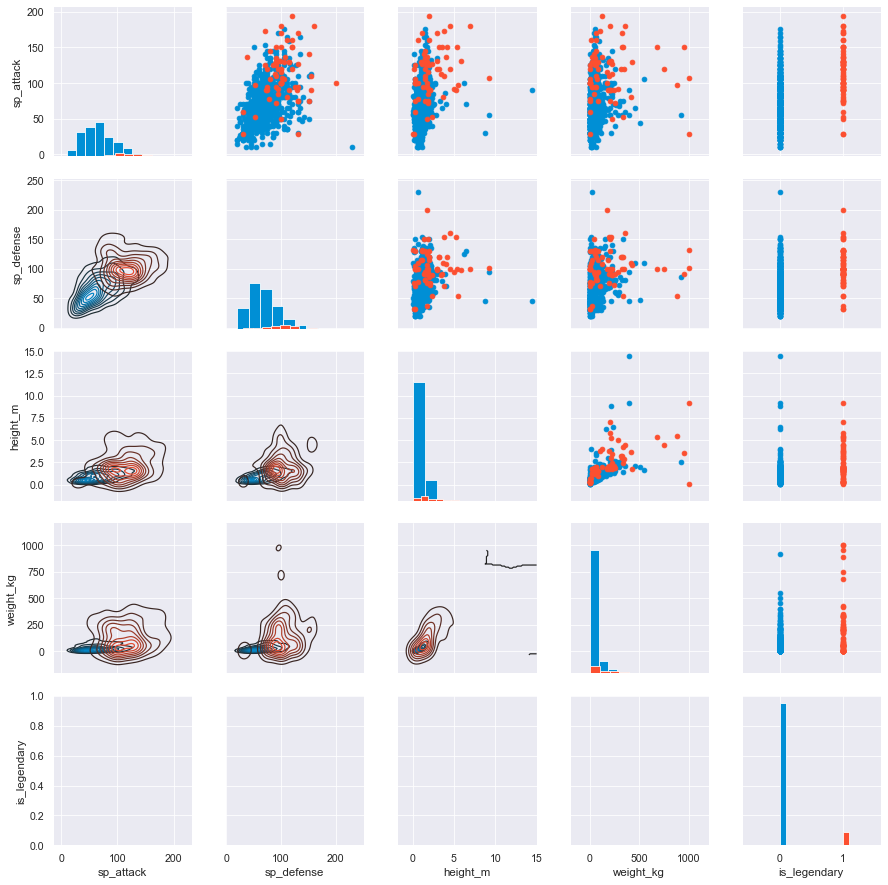

In [25]:
pairgrid_df = df[['sp_attack', 'sp_defense','height_m', 'weight_kg', 'is_legendary']]
pairgrid_df = sns.PairGrid(pairgrid_df, hue='is_legendary')
pairgrid_df.map_diag(plt.hist)
pairgrid_df.map_upper(plt.scatter)
pairgrid_df.map_lower(sns.kdeplot);

### 4. Facet Grid

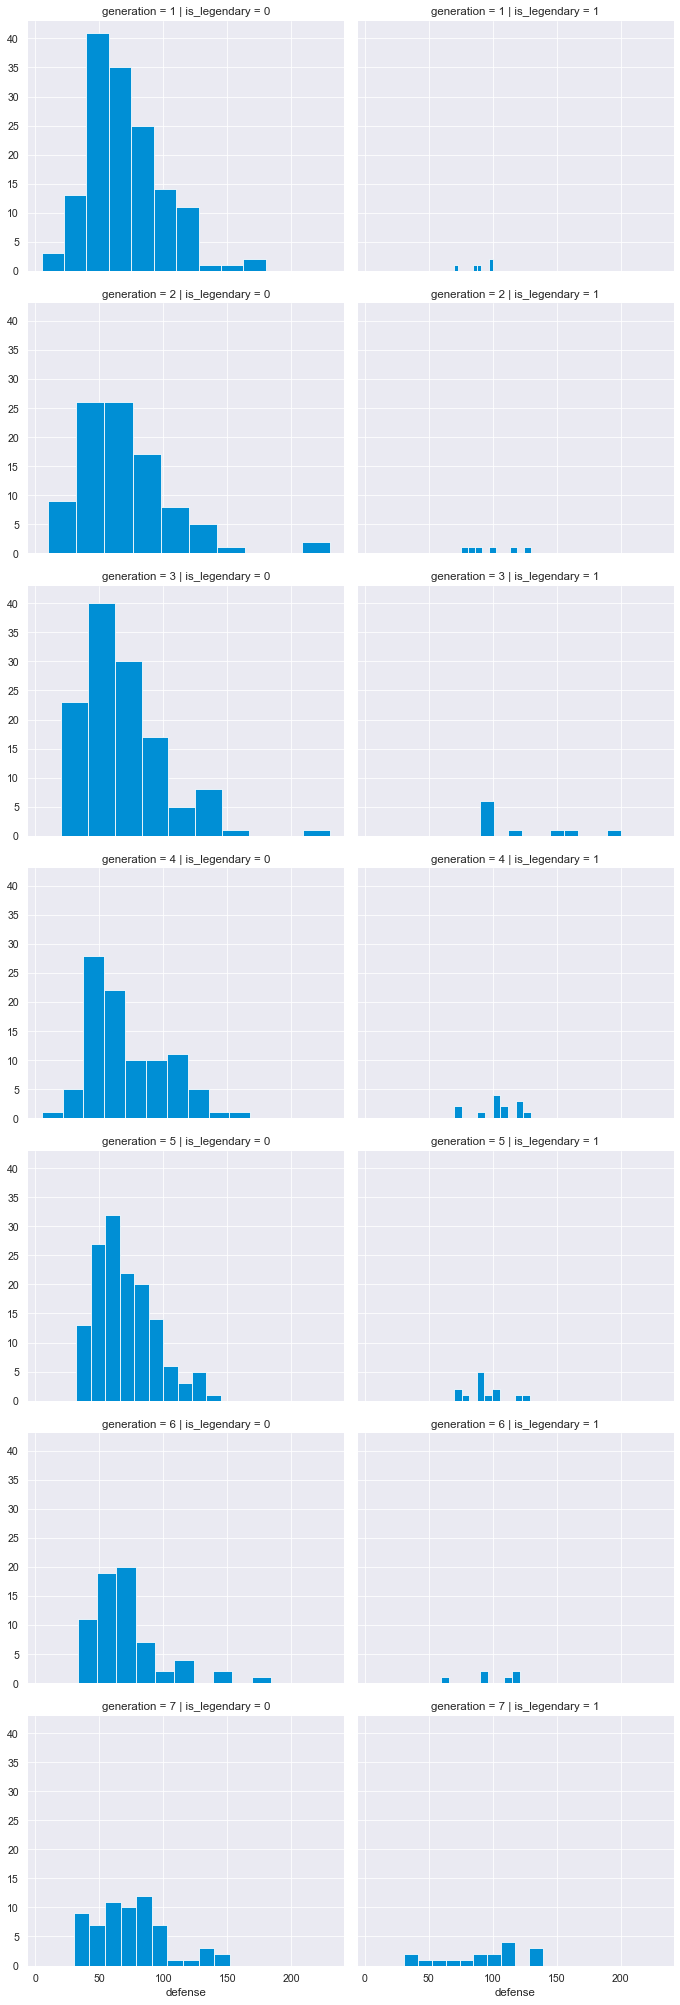

In [26]:
facetgrid_df = df[['is_legendary', 'generation', 'defense']]
facetgrid_df = sns.FacetGrid(data=facetgrid_df, row='generation', col='is_legendary',height=4, aspect=1.2)
facetgrid_df.map(plt.hist, 'defense');